<a href="https://colab.research.google.com/github/SUNNYTHAKURCODE/MACHINELEARNING/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [20]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

n_samples: The total number of points equally divided among clusters.
Value taken as : 5000
centers: The number of centers to generate, or the fixed center locations.
Value taken as : [[4, 4], [-2, -1], [2, -3],[1,1]]
cluster_std: The standard deviation of the clusters.
Value taken as: 0.9

In [0]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

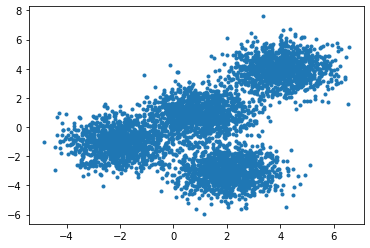

In [22]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [0]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 100)

In [24]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 1, ..., 0, 1, 0], dtype=int32)

In [26]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 4.03452175,  3.96641167],
       [ 2.04902163, -3.06298804],
       [-1.99549745, -1.06104125],
       [ 0.98718228,  0.94409375]])

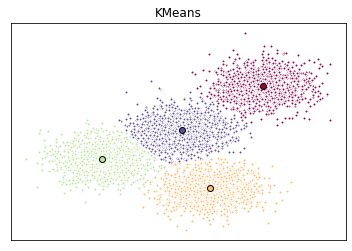

In [27]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()